
# Project: Investigate a Dataset (TMDB Dataset )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Overview: 

To complete this project i used tmdb dataset which has data about over 10000 movies gathered from TMDB.

#### Questions: 

<ol>
<li>Which movies had the most and least Budgets, Revenues and Profits?</li>
<li>Which years had the most profits?</li>
<li>What's the correlatin between average budget vs average revenue?</li>
<li>what's the average movie runtime duration?</li>
<li>Did genre effect movie profits?</li>
<li>Who are the most frequent cast?</li>    
<li>Did votes average have effect on profits?</li>    
<li>Which are the most successful productions companies over the time?</li>
    
</ol>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section we will examine our data and check for duplicates, null values and datatypes.
We will delete duplicates, replace zero values with null values then delete all null values, and remove the unwanted columns to make the data analysis process faster, in the end we will modify datatypes if needed.

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> ### Notes: 
1. Dataset has many unwanted columns.
2. Budget and Revenue columns has no curreny, we will assume the curreny is USD as it's the most common currency in the world.
3. Genres and cast columns need some processing.



### Data Cleaning (Fixing the dataset)

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df.drop(columns= [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'tagline'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1018.8+ KB


In [5]:
df.shape

(10866, 12)

In [6]:
#check for duplicates
df.duplicated().sum()

1

In [7]:
#removing duplicate values
df.drop_duplicates(keep ='first', inplace=True)
df.shape

(10865, 12)

In [8]:
#list of the columns we will work on next
zero_list = ['budget', 'revenue', 'production_companies']

In [9]:
#replacing zero values with NAN 
df[zero_list] = df[zero_list].replace(0, np.NAN)

In [10]:
#removing the rows with NAN values in the columns we chose
df.dropna(subset = zero_list, inplace = True)

In [11]:
df.shape

(3808, 12)

In [12]:
df['production_companies'].isna().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3808 non-null   float64
 1   revenue               3808 non-null   float64
 2   original_title        3808 non-null   object 
 3   cast                  3806 non-null   object 
 4   director              3807 non-null   object 
 5   runtime               3808 non-null   int64  
 6   genres                3808 non-null   object 
 7   production_companies  3808 non-null   object 
 8   release_date          3808 non-null   object 
 9   vote_count            3808 non-null   int64  
 10  vote_average          3808 non-null   float64
 11  release_year          3808 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 386.8+ KB


> At the end of this step we now have a clean dataset with no duplicates, missing values or unwanted columns.

<a id='eda'></a>
## Exploratory Data Analysis

> ### Calculate the profits of each movie



In [14]:
#changing the budget and revenue columns datatypes from float to int
df['budget'] = df['budget'].astype(np.int64)
df['revenue'] = df['revenue'].astype(np.int64)

#creating a new profit column and adding it to the dataframe
df.insert(2, 'profit', df['revenue'] - df['budget'])
df.head(1)

,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [15]:
df.dtypes

budget                    int64
revenue                   int64
profit                    int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

### Research Question 1:  Which movies had the most and least Budgets, Revenues and Profits?

In [16]:
#function to calculate the maximum and minimum values in a column
def calculateCost(column):
    
    highest = df.loc[df[column].idxmax()]
     
    lowest = df.loc[df[column].idxmin()]
    
    return pd.concat([highest, lowest], axis=1)

In [17]:
#calculating the highest and lowest profits
calculateCost('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,12/10/09,12/2/10


As shown above, the highest profits go to the movie Avatar and the least profits go to the movie The Warrior's Way.

In [18]:
#calculating the highest and lowest budget
calculateCost('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
release_date,12/2/10,4/23/99


As shown above, the highest Budget go to the movie The Warrior's Way and the least profits go to the movie Lost & Found.

In [19]:
#calculating the highest and lowest revenue
calculateCost('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,12/10/09,11/14/03


As shown above, the highest profits go to the movie Avatar and the least profits go to the movie Shattered Glass.

### Research Question 2: Which years had the most profits?

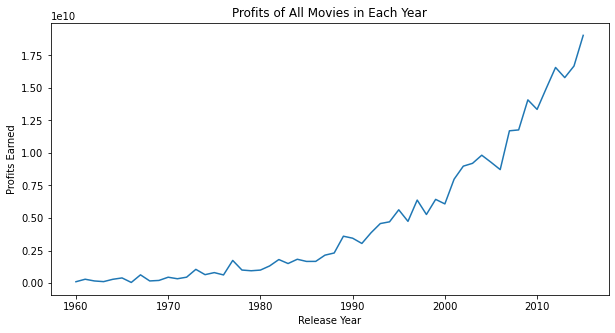

In [20]:
#Calculating the sum of all movies profits in each year
year_profit = df.groupby('release_year')['profit'].sum()

#figure size
plt.figure(figsize=(10, 5))
plt.plot(year_profit);

#figure details
plt.title('Profits of All Movies in Each Year')
plt.xlabel('Release Year')
plt.ylabel('Profits Earned');

In [21]:
#finding year with most profits
year_profit.idxmax()

2015

>As shown above, The year 2015 gained the most profits of all years.

We will narrow down the dataset more to movies with profits more than 20 million dollars

In [22]:
new_df = df[df['profit']>= 20000000]
#updating the index to start from 1 to the end of this new dataset
new_df.index = range(1, len(new_df)+1)

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 1 to 1926
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1926 non-null   int64  
 1   revenue               1926 non-null   int64  
 2   profit                1926 non-null   int64  
 3   original_title        1926 non-null   object 
 4   cast                  1926 non-null   object 
 5   director              1926 non-null   object 
 6   runtime               1926 non-null   int64  
 7   genres                1926 non-null   object 
 8   production_companies  1926 non-null   object 
 9   release_date          1926 non-null   object 
 10  vote_count            1926 non-null   int64  
 11  vote_average          1926 non-null   float64
 12  release_year          1926 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 195.7+ KB


### Research Question 3:  What's the correlatin between average budget vs average revenue?

>We will calculate the average budget and average revenue, then we will discover the correlation between budget and revenue

In [24]:
#Calculating Average Budget
#function to return the mean of a certain column
def cal_mean(column):
    return new_df[column].mean()


cal_mean('budget')

50021753.23052959

In [25]:
#Calculating Average Revenue
cal_mean('revenue')

195204074.65005192

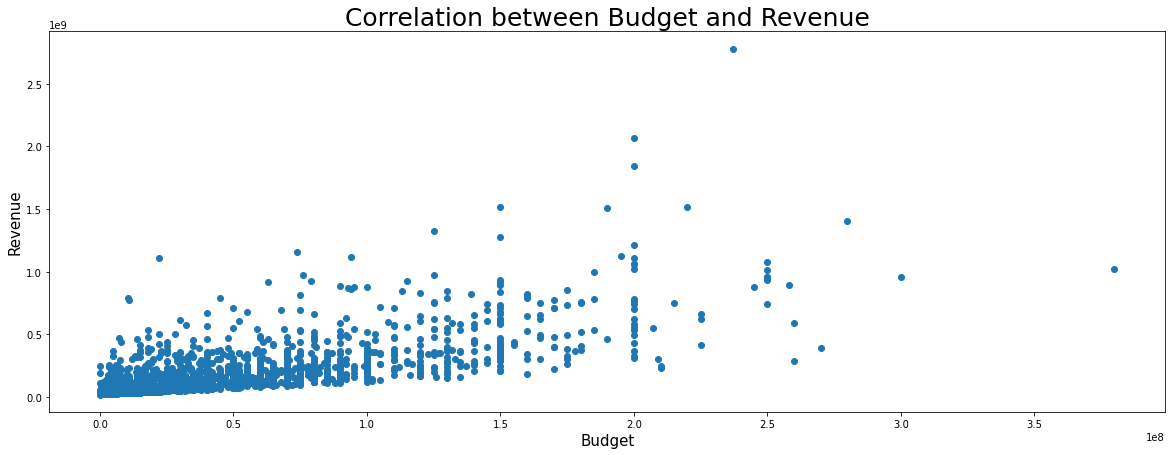

In [26]:
plt.figure(figsize=(20, 7))
plt.scatter(new_df['budget'], new_df['revenue']);
#figure details
plt.title('Correlation between Budget and Revenue', fontsize=25)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Revenue', fontsize=15);

> As we can see there's a positive correlation between budget and revenue

### Research Question 4:  what's the average movie runtime duration?

In this section we will calculate the average movie duration.

In [27]:
#calculating Average Movie Runtime Duration
cal_mean('runtime')

112.28920041536864

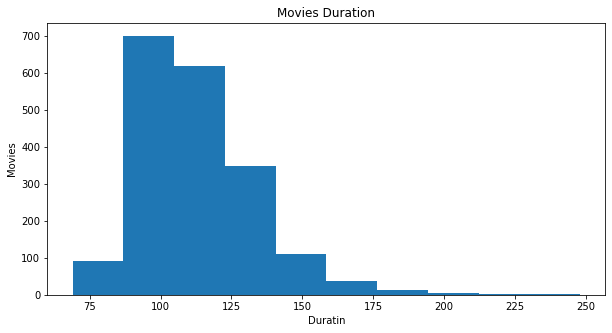

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(new_df['runtime']);
#figure details
plt.title('Movies Duration')
plt.xlabel('Duratin')
plt.ylabel('Movies');

> This figure shows the distribution of movie durations

In [29]:
calculateCost('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_date,5/19/10,6/2/03


This shows the longest and shortest movies in the dataset.

### Research Question 5:  Which genres are more successful?

In [30]:
#check genre occurances
new_df.genres.value_counts()

Comedy                                 133
Drama                                   92
Comedy|Romance                          60
Horror|Thriller                         44
Drama|Romance                           38
                                      ... 
Thriller|Mystery|Science Fiction         1
Crime|Drama|History                      1
Drama|Science Fiction|Thriller           1
Drama|Thriller|War                       1
Thriller|Action|Drama|Music|Romance      1
Name: genres, Length: 669, dtype: int64

In [31]:
#fixing genres by splitting then in a new dataframe

df_genres = pd.DataFrame(data=new_df.genres.str.split('|').tolist(), index=new_df.release_year).stack()
df_genres = df_genres.reset_index([0,'release_year'])
df_genres.columns = ['release_year', 'genre']
df_genres.head()

,release_year,genre
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,Action


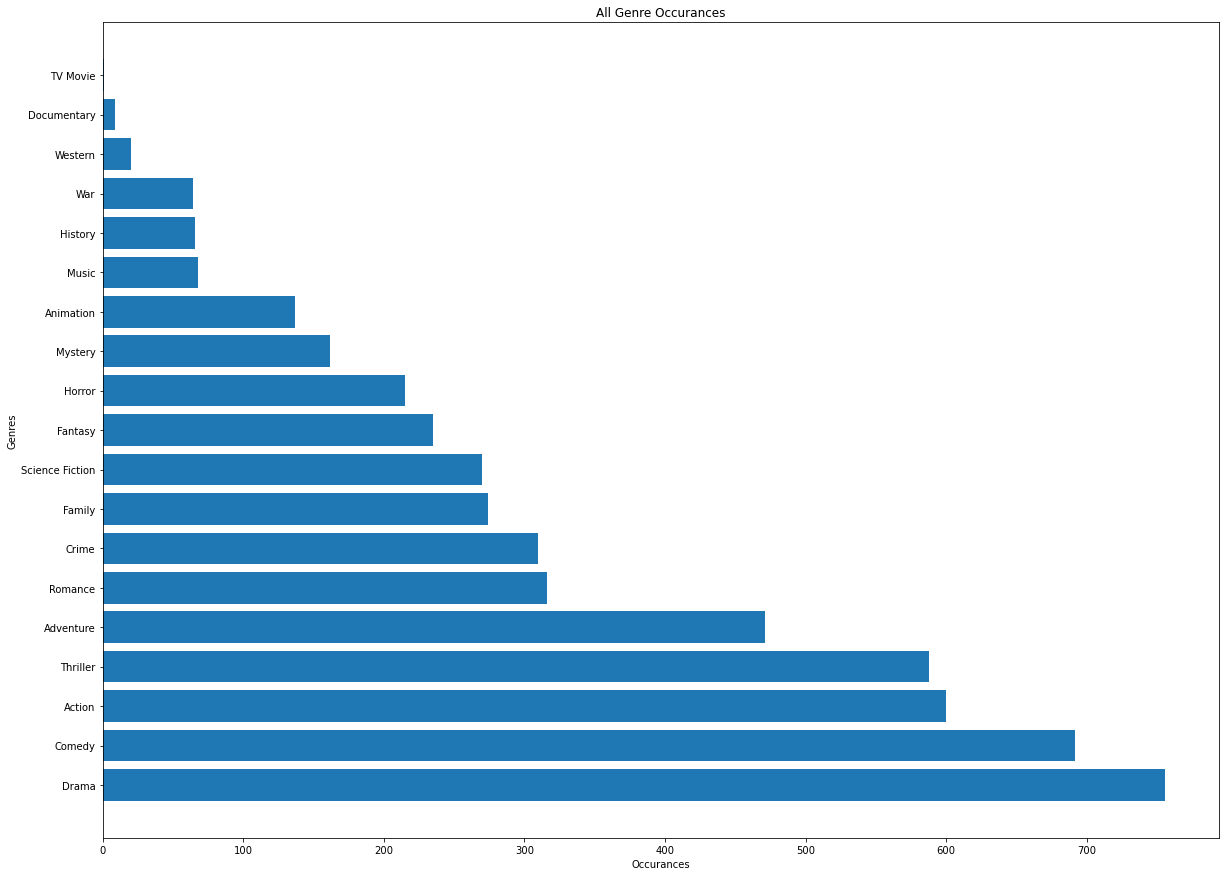

In [38]:
x = df_genres.genre.value_counts().index
y = df_genres.genre.value_counts().values
plt.figure(figsize=(20, 15))
plt.barh(x, y);
#figure details
plt.title('All Genre Occurances')
plt.xlabel('Occurances')
plt.ylabel('Genres');

> The previous figure shows the distribution of movie genres 

### Research Question 6:  Who are the most frequent cast?

In [33]:
new_df.cast.value_counts()

William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith            3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish              2
                                                                                   ..
Ellar Coltrane|Patricia Arquette|Ethan Hawke|Elijah Smith|Lorelei Linklater         1
Mary Elizabeth Winstead|Ryan Merriman|Kris Lemche|Alexz Johnson|Sam Easton          1
Tobey Maguire|Willem Dafoe|Kirsten Dunst|James Franco|Cliff Robertson               1
Hugh Jackman|James McAvoy|Patrick Stewart|Michael Fassbender|Ian McKellen           1
Scarlett Johansson|Morgan Freeman|Choi Min-sik|Amr Waked|Julian Rhind-Tutt          1
Name: cast, Length: 1906, dtype: int64

In [34]:
#making a new dataframe to separate cast names 
cast_df = new_df['cast'].str.cat(sep = '|')
cast_df = pd.Series(cast_df.split('|'))
cast_df.value_counts().head(20)

Tom Cruise            30
Brad Pitt             29
Tom Hanks             28
Robert De Niro        27
Bruce Willis          26
Samuel L. Jackson     25
Cameron Diaz          24
Eddie Murphy          23
Johnny Depp           23
Sylvester Stallone    23
Robin Williams        22
Mark Wahlberg         22
Denzel Washington     21
Matt Damon            21
Nicolas Cage          21
Jim Carrey            20
George Clooney        20
Harrison Ford         20
Adam Sandler          20
Ben Stiller           19
dtype: int64

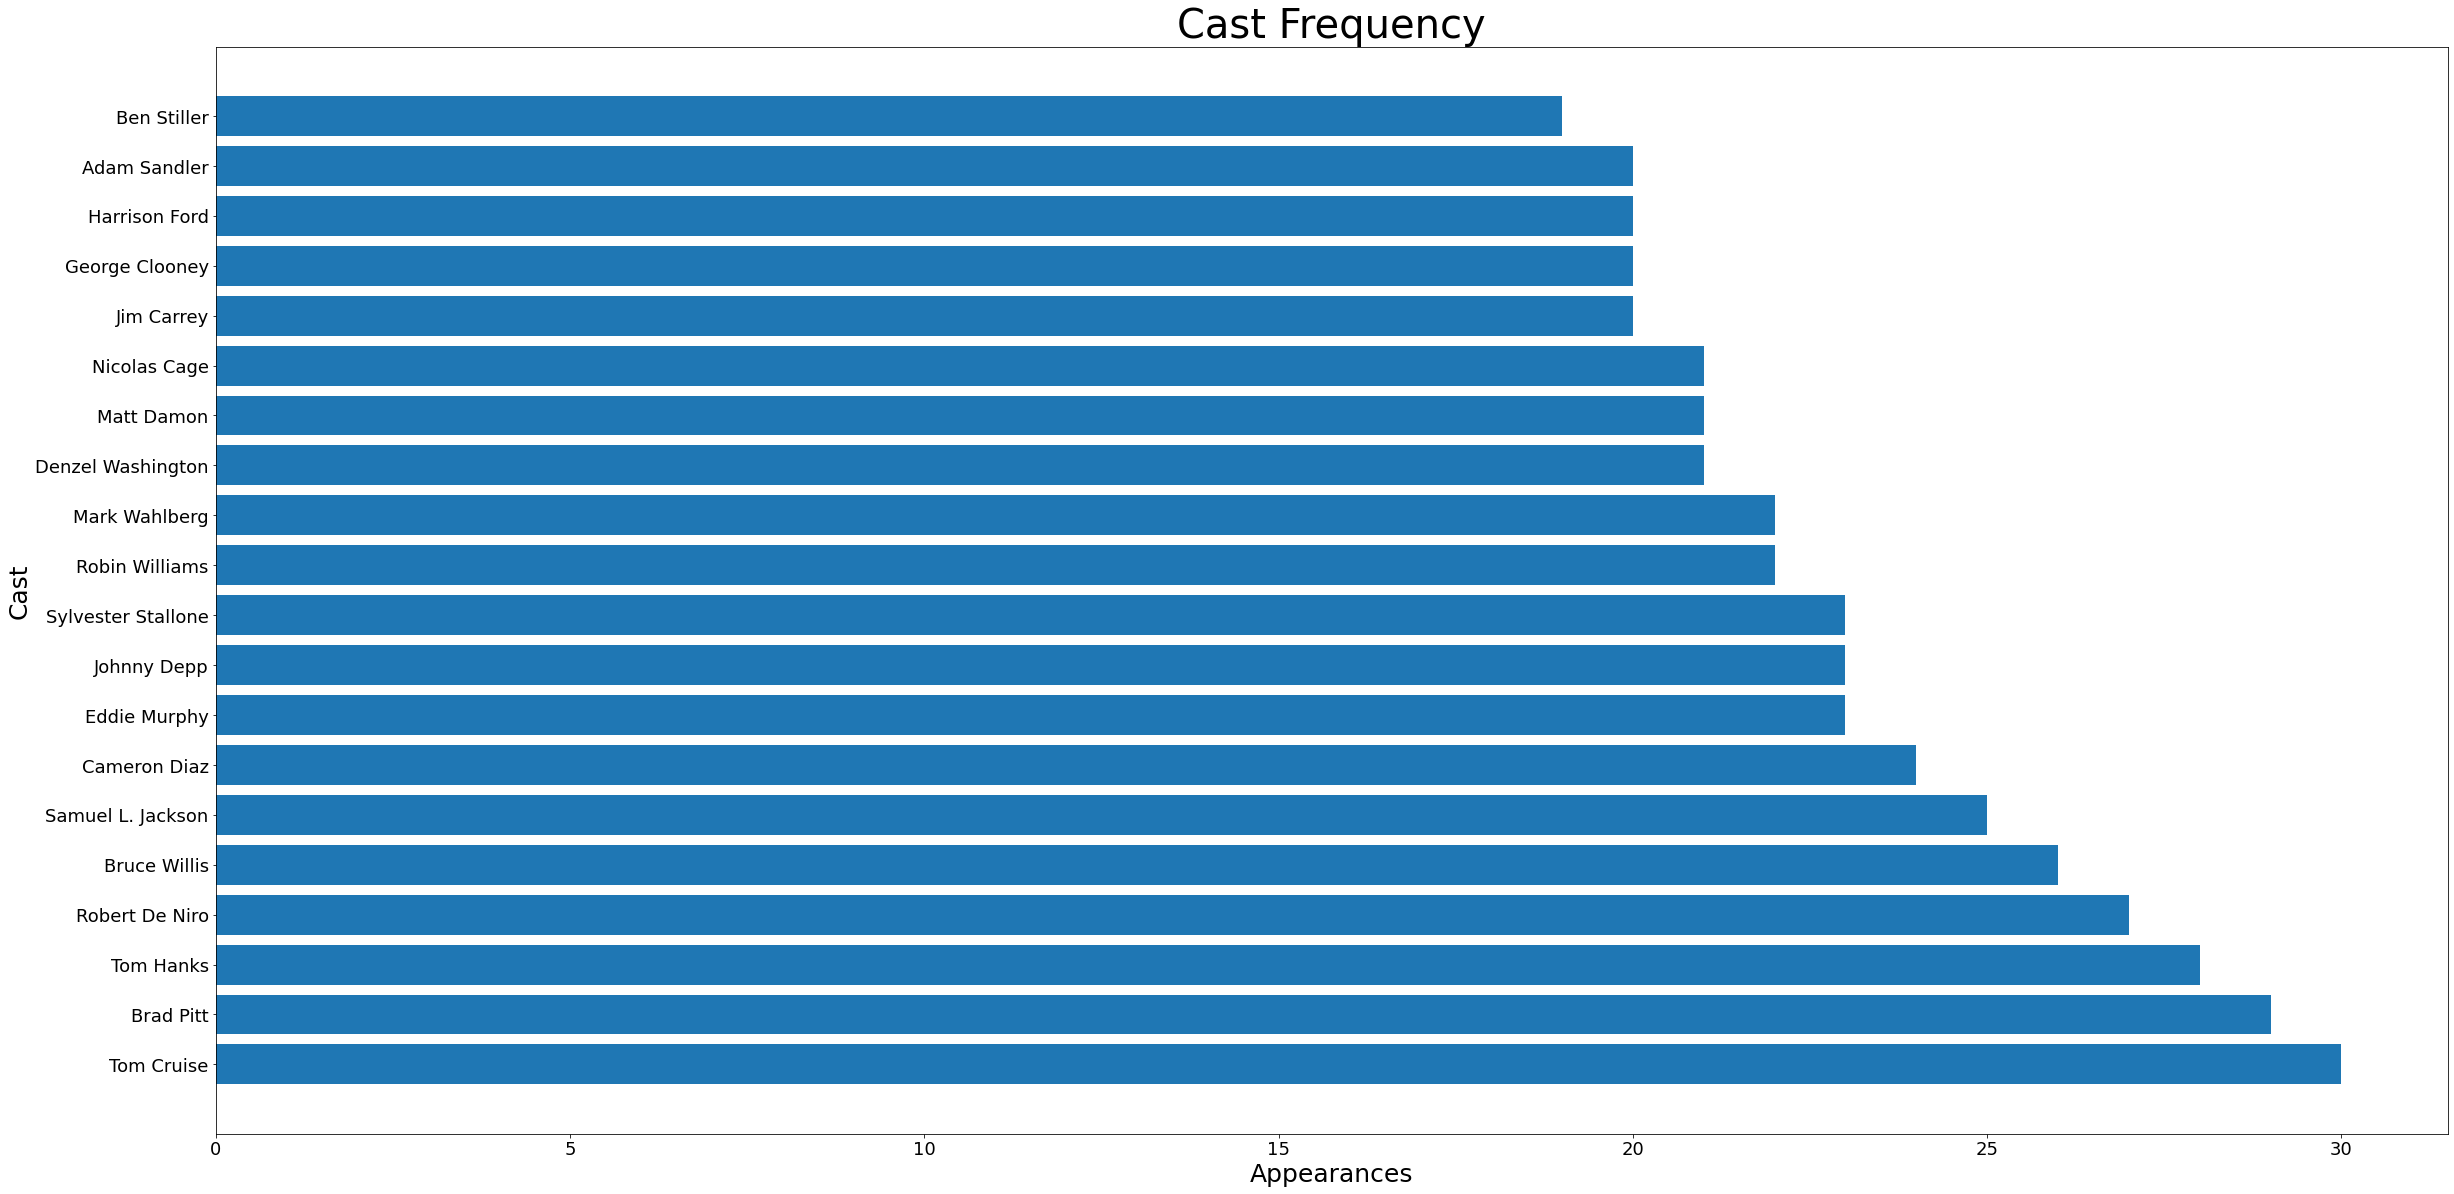

In [57]:
cast_freq = cast_df.value_counts().head(20)
x = cast_freq.index
y = cast_freq.values
plt.figure(figsize=(40, 20))
plt.rcParams['font.size'] = '18'
plt.barh(x, y );
#figure details

plt.title('Cast Frequency', fontsize=40)
plt.xlabel('Appearances', fontsize=25)
plt.ylabel('Cast', fontsize=25);


> The previous figure shows the most frequent 20 actors(actresses) in movies

### Research Question 7:  Did votes average have effect on profits?

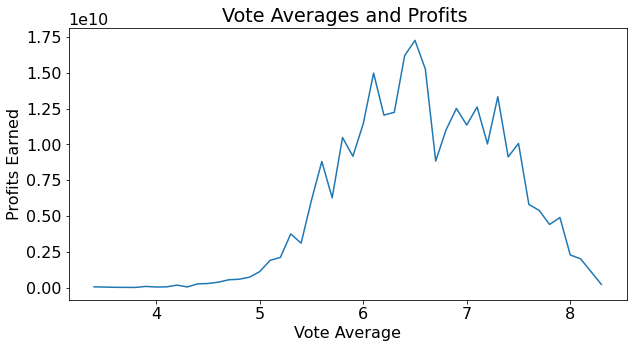

In [47]:
vote_profit = new_df.groupby('vote_average')['profit'].sum()

#figure size
plt.figure(figsize=(10, 5))
plt.plot(vote_profit);
#figure details
plt.title('Vote Averages and Profits ')
plt.xlabel('Vote Average')
plt.ylabel('Profits Earned');

### Research Question 8:  Which are the most successful production companies over the time?

In [48]:
#fixing genres by splitting then in a new dataframe

df_companies = pd.DataFrame(data=new_df.production_companies.str.split('|').tolist(), index=new_df.release_year).stack()
df_companies = df_companies.reset_index([0,'release_year'])
df_companies.columns = ['release_year', 'production_company']
df_companies.head()

,release_year,production_company
0,2015,Universal Studios
1,2015,Amblin Entertainment
2,2015,Legendary Pictures
3,2015,Fuji Television Network
4,2015,Dentsu


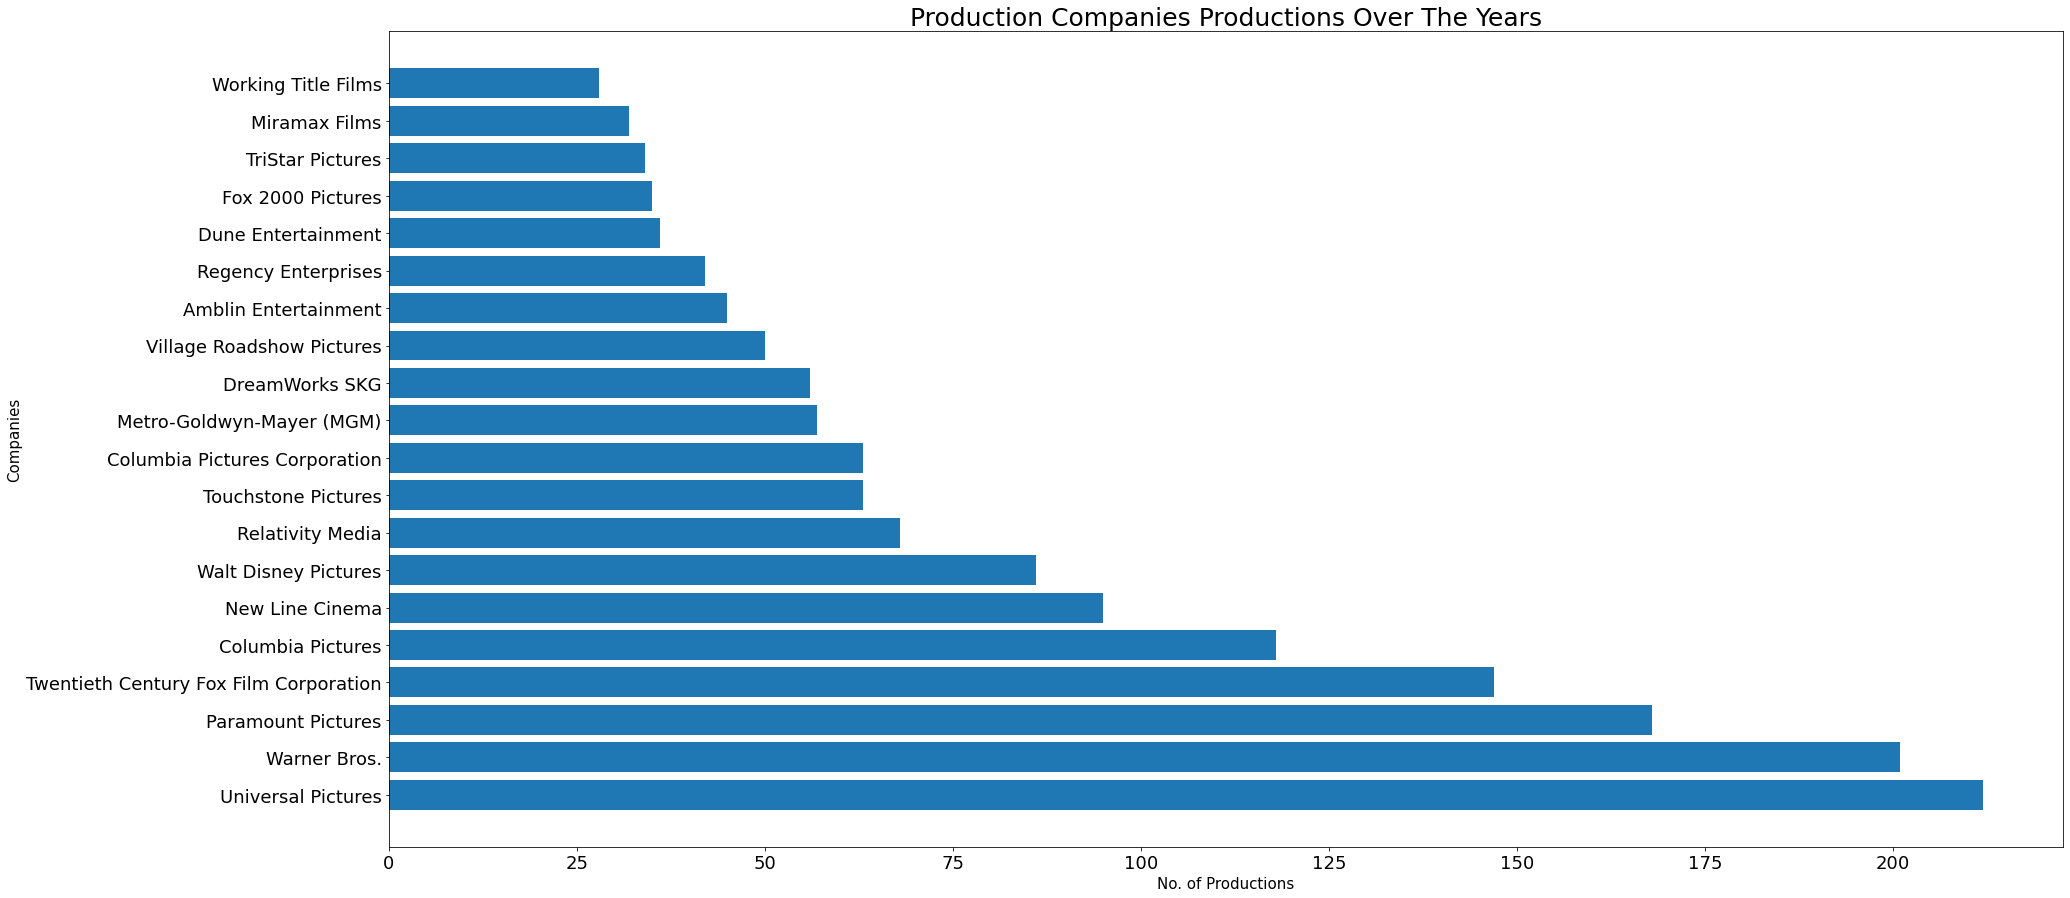

In [56]:
company_freq = df_companies.production_company.value_counts().head(20)

x = company_freq.index
y = company_freq.values
plt.figure( figsize=(30,15))
plt.rcParams['font.size'] = '18'
plt.barh(x, y)

#figure details
plt.title('Production Companies Productions Over The Years', fontsize=25);
plt.xlabel('No. of Productions', fontsize=15)
plt.ylabel('Companies', fontsize=15);
#plt.legend()
#plt.show()

> The figure above shows the 10 biggest production companies.

<a id='conclusions'></a>
## Conclusions

> This Data Analysis shows us alot about the movie industry and the factors to make successful and profitable movies. However that is not all the factors but we covered some strong factors and analyzed a large dataset.
According to our analysis these are some factors that help increase movie success.


### Successful movies share the following characteristics:
1. Movie genre should be one of the following: Comedy, Drama, Action, Thriller or Adventure.
2. To get Box Office profits movie budget should be around 50 million dollars as there's a positive correlation between budget and revenue.
3. Movie duration should be around 112 minutes as that is the average duration to all movies with profits more than 20 million dollars.
4. Movie votes should be around around 5.5 and 7.5 to get at least 20 million dollars profits.
5. Cast has big impact on revenues so the movie should have at least one name of the top 10 most frequent actors(actresses) in the successful movies such as: Tom Cruise, Tom Hanks, Brad Pitt, Johnny Depp and Cameron Diaz. 

### Limitations: 
The Data Analysis was made on movies with profits more than 20 million dollars, so the results might not be so accurate of error-free but if you follow these suggestions it may increase the chances of getting more profits.
This analysis is made on large time scale data so the factors of success might vary a little every decade or so but in general it should give you at least one valid suggestion to make your movie a Box Office hit.
